In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
salaries = pd.read_csv('../data/salaries.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [6]:
salaries.info()
salaries.describe()
salaries.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
print("Experience Levels:\n", salaries['experience_level'].value_counts())

print("\nEmployment Types:\n", salaries['employment_type'].value_counts())

print("\nTop Job Titles:\n", salaries['job_title'].value_counts().head(10))

print("\nCompany Size:\n", salaries['company_size'].value_counts())

print("\nRemote Ratio:\n", salaries['remote_ratio'].value_counts())

Experience Levels:
 SE    51596
MI    26748
EN     8381
EX     1859
Name: experience_level, dtype: int64

Employment Types:
 FT    88111
PT      233
CT      224
FL       16
Name: employment_type, dtype: int64

Top Job Titles:
 Data Scientist               13156
Data Engineer                10883
Software Engineer             9596
Data Analyst                  8652
Machine Learning Engineer     6443
Engineer                      5344
Manager                       3488
Research Scientist            2553
Analyst                       2066
Applied Scientist             1778
Name: job_title, dtype: int64

Company Size:
 M    85667
L     2703
S      214
Name: company_size, dtype: int64

Remote Ratio:
 0      69580
100    18708
50       296
Name: remote_ratio, dtype: int64


In [8]:
exp_map = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive'
}

salaries['experience_level'] = salaries['experience_level'].map(exp_map)

In [9]:
emp_type_map = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

salaries['employment_type'] = salaries['employment_type'].map(emp_type_map)

In [10]:
remote_map = {
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
}

salaries['remote_ratio'] = salaries['remote_ratio'].map(remote_map)

In [11]:
salaries[['experience_level', 'employment_type', 'remote_ratio']].drop_duplicates()

,experience_level,employment_type,remote_ratio
0,Mid-level,Full-time,Hybrid
1,Senior-level,Full-time,On-site
5,Entry-level,Full-time,On-site
13,Senior-level,Full-time,Remote
17,Mid-level,Full-time,Remote
22,Mid-level,Full-time,On-site
96,Entry-level,Full-time,Remote
156,Mid-level,Contract,On-site
198,Senior-level,Contract,Remote
250,Executive,Full-time,On-site


/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_8805/1227572921.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=salaries, x='experience_level', y='salary_in_usd', estimator='mean', ci=None)


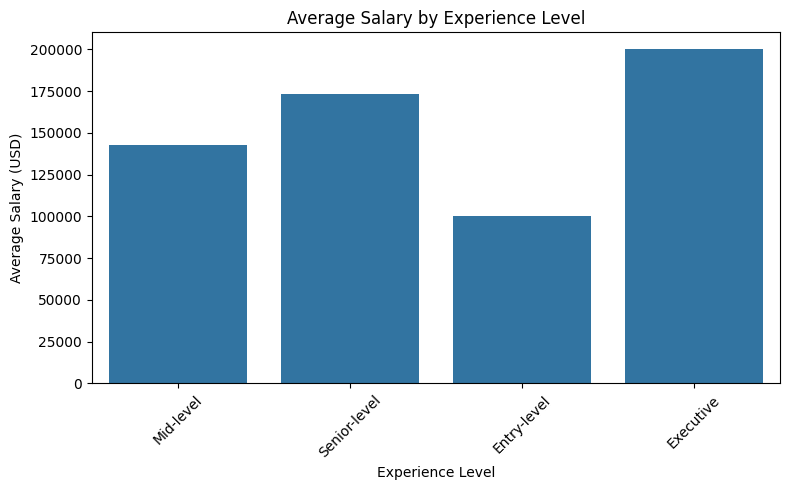

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=salaries, x='experience_level', y='salary_in_usd', estimator='mean', ci=None)
plt.title('Average Salary by Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_8805/1688269114.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=salaries, x='remote_ratio', y='salary_in_usd', estimator='mean', ci=None)


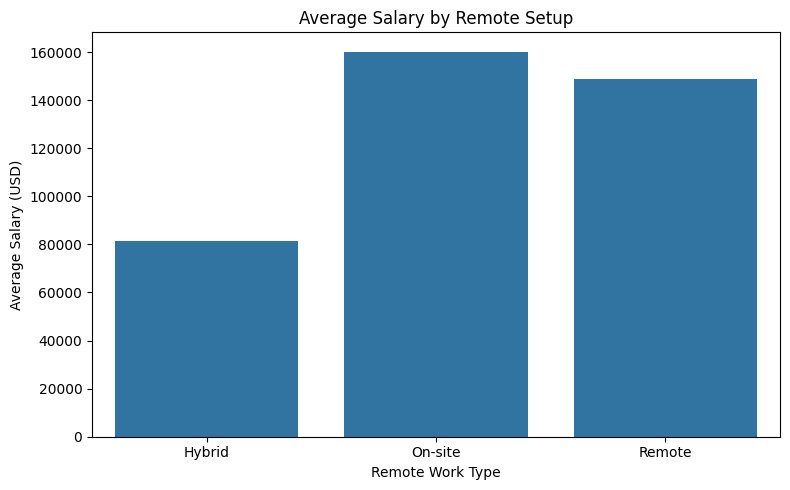

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=salaries, x='remote_ratio', y='salary_in_usd', estimator='mean', ci=None)
plt.title('Average Salary by Remote Setup')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Remote Work Type')
plt.tight_layout()
plt.show()

/var/folders/w8/xqr53ssj0s5g2rgqk8h5gv8w0000gn/T/ipykernel_8805/3740972152.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_jobs_df, x='salary_in_usd', y='job_title', estimator='mean', ci=None)


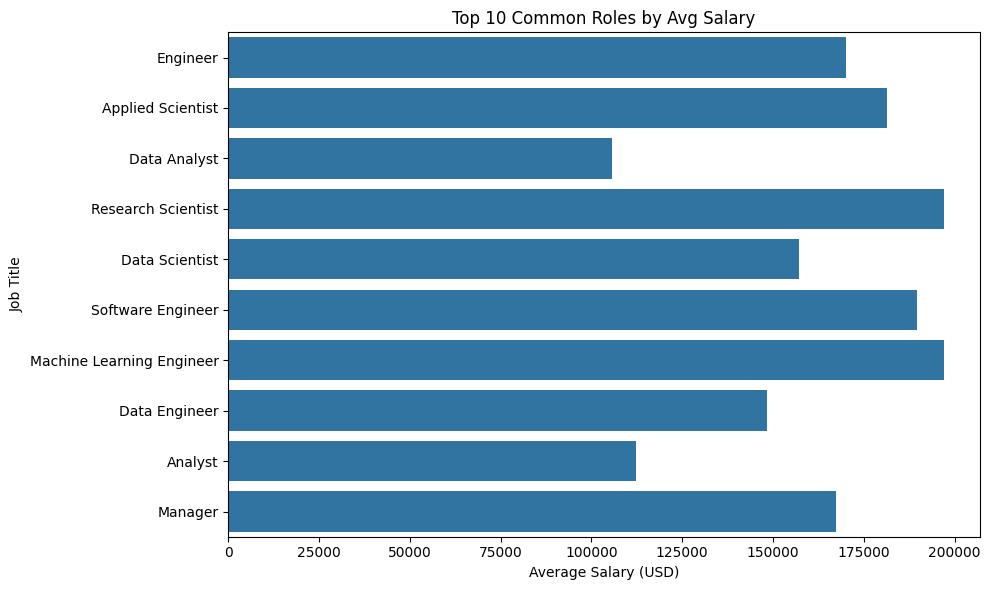

In [14]:
top_jobs = salaries['job_title'].value_counts().head(10).index
top_jobs_df = salaries[salaries['job_title'].isin(top_jobs)]

plt.figure(figsize=(10,6))
sns.barplot(data=top_jobs_df, x='salary_in_usd', y='job_title', estimator='mean', ci=None)
plt.title('Top 10 Common Roles by Avg Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

# Modeling

## Linear Regression

In [15]:
model_df = salaries[[
    'experience_level',
    'employment_type',
    'job_title',
    'remote_ratio',
    'company_size',
    'salary_in_usd'
]].copy()

In [16]:
model_df_encoded = pd.get_dummies(model_df.drop('salary_in_usd', axis=1), drop_first=True)

model_df_encoded['salary_in_usd'] = model_df['salary_in_usd']

In [18]:
X = model_df_encoded.drop('salary_in_usd', axis=1)
y = model_df_encoded['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 4208152811.71
R-squared Score: 0.2381


## Random Forest

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.4f}")

Random Forest MSE: 4240917189.27
Random Forest R²: 0.2321


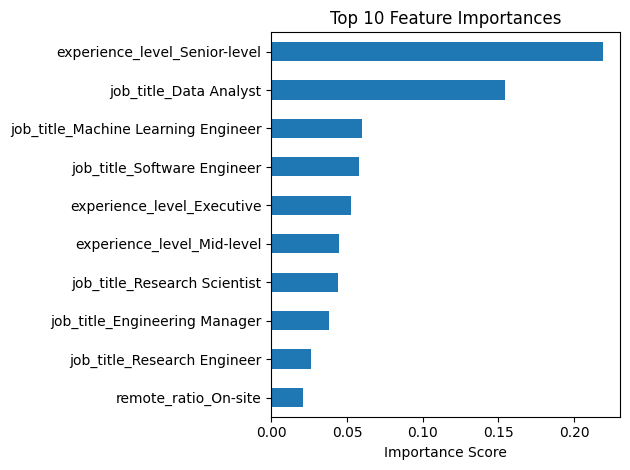

In [24]:
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns)

# Plot top 10
features.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()